In [1]:
# imports

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 20)

# Extract & Load

In [3]:
ls -lh ./data

total 12G
-rw-r--r-- 1 mijka mijka 5,6G 22 avril 10:03 en.openfoodfacts.org.products.csv
-rw-r--r-- 1 mijka mijka 5,7G 22 avril 10:01 fr.openfoodfacts.org.products.csv
-rw-r--r-- 1 mijka mijka 809M 21 avril  2017 fr.openfoodfacts.org.products_old.csv


In [4]:
csv_path = './data/fr.openfoodfacts.org.products.csv'
csv_path_old = './data/fr.openfoodfacts.org.products_old.csv'
#df = pd.read_csv('./data/fr.openfoodfacts.org.products.csv', sep='delimiter', header=None)
#df = pd.read_csv(csv_path, on_bad_lines='skip')
df = pd.read_csv(csv_path, sep='\t', header='infer', on_bad_lines='skip', low_memory=False)
#df_old = pd.read_csv(csv_path_old, sep='\t', header='infer', on_bad_lines='skip', low_memory=False)

# Explore

## Functions

In [59]:
def get_df_columns_na(df):
    counts = df.isna().sum()
    percentages = round(df.isna().mean() * 100, 1)
    null_values = pd.concat([counts, percentages], axis = 1, keys = ["count", "null_percent"])
    null_values['columns'] = null_values.index
    null_values = null_values[['columns', 'count', 'null_percent']]
    return null_values

In [9]:
def plot_df_xy(df, x_val, y_val, height_val = 20, width_val = 13):
    sns.catplot(data=df, x= x_val, y= y_val, kind="bar", height=height_val, aspect=width_val/height_val)
    sns.set(rc={'figure.figsize':(width_val,height_val)})
    plt.xticks(rotation=70)
    plt.tight_layout()

## Cardinality 

In [5]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-fr.openfoodfacts.org/produit/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00000000000003429145,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,1630483911,2021-09-01T08:11:51Z,1630484064,2021-09-01T08:14:24Z,L.casei,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000017,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000031,http://world-fr.openfoodfacts.org/produit/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000000000003327986,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1624390765,2021-06-22T19:39:25Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.describe()

,created_t,last_modified_t,cities,allergens_fr,serving_quantity,no_nutriments,additives_n,additives,nutriscore_score,nova_group,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
count,2.282517e+06,2.282517e+06,0.0,0.0,5.308960e+05,0.0,758512.000000,0.0,779842.000000,682466.000000,...,12138.000000,779846.000000,6.000000,5.0000,2.000000,74.000000,1712.000000,41.000000,77.000000,45.000000
mean,1.570776e+09,1.610378e+09,NaN,NaN,2.092906e+16,NaN,2.011496,NaN,9.090063,3.381807,...,609.468917,9.090114,16.333333,41.3400,4550.737500,2.815816,0.068921,3.352927,1.980488,0.023650
std,5.675199e+07,3.345334e+07,NaN,NaN,1.524940e+19,NaN,2.878295,NaN,8.848157,0.992255,...,6015.010480,8.848171,10.819735,20.9685,6433.628726,17.273558,1.826776,1.687217,12.002286,0.083955
min,1.328021e+09,1.353582e+09,NaN,NaN,0.000000e+00,NaN,0.000000,NaN,-15.000000,1.000000,...,0.049000,-15.000000,-3.000000,14.0000,1.475000,0.000000,0.000000,0.400000,0.001350,0.000800
25%,1.532097e+09,1.587629e+09,NaN,NaN,2.800000e+01,NaN,0.000000,NaN,1.000000,3.000000,...,103.600000,1.000000,13.000000,30.0000,2276.106250,0.040500,0.000008,2.400000,0.009400,0.007000
50%,1.581448e+09,1.617569e+09,NaN,NaN,5.500000e+01,NaN,1.000000,NaN,10.000000,4.000000,...,323.400000,10.000000,22.000000,44.0000,4550.737500,0.071800,0.000023,3.600000,0.025000,0.009500
75%,1.617540e+09,1.641786e+09,NaN,NaN,1.140000e+02,NaN,3.000000,NaN,16.000000,4.000000,...,611.000000,16.000000,22.000000,48.7000,6825.368750,0.119250,0.000096,4.000000,0.051000,0.015000
max,1.650593e+09,1.650593e+09,NaN,NaN,1.111111e+22,NaN,49.000000,NaN,40.000000,4.000000,...,656298.600000,40.000000,25.000000,70.0000,9100.000000,136.000000,54.000000,8.000000,75.000000,0.572000


In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282517 entries, 0 to 2282516
Data columns (total 186 columns):
 #    Column                                                 Dtype  
---   ------                                                 -----  
 0    code                                                   object 
 1    url                                                    object 
 2    creator                                                object 
 3    created_t                                              int64  
 4    created_datetime                                       object 
 5    last_modified_t                                        int64  
 6    last_modified_datetime                                 object 
 7    product_name                                           object 
 8    abbreviated_product_name                               object 
 9    generic_name                                           object 
 10   quantity                                            

## Missing Data 

In [60]:
data_na = get_df_columns_na(df)

In [61]:
pd.set_option('display.max_rows', None)
data_na

,columns,count,null_percent
code,code,0,0.0
url,url,0,0.0
creator,creator,4,0.0
created_t,created_t,0,0.0
created_datetime,created_datetime,0,0.0
last_modified_t,last_modified_t,0,0.0
last_modified_datetime,last_modified_datetime,0,0.0
product_name,product_name,86006,3.8
abbreviated_product_name,abbreviated_product_name,2274653,99.7
generic_name,generic_name,2154980,94.4


In [84]:
chol_row = data_na.loc[data_na['columns'][['code','phylloquinone_100g', 'inositol_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g']]]
chol_row

,columns,count,null_percent
code,code,0,0.0
phylloquinone_100g,phylloquinone_100g,2280805,99.9
inositol_100g,inositol_100g,2282440,100.0
fruits-vegetables-nuts-estimate-from-ingredients_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,1525337,66.8


In [ ]:
plot_df_xy(data_na, 'null_percent', 'columns', 6)

In [120]:
data_na_sort = data_na.sort_values(by='null_percent',ascending=False)
data_na_sort

,columns,count,null_percent
code,code,0,0.0
url,url,0,0.0
creator,creator,4,0.0
created_t,created_t,0,0.0
created_datetime,created_datetime,0,0.0
last_modified_t,last_modified_t,0,0.0
last_modified_datetime,last_modified_datetime,0,0.0
states,states,0,0.0
states_tags,states_tags,0,0.0
states_fr,states_fr,0,0.0


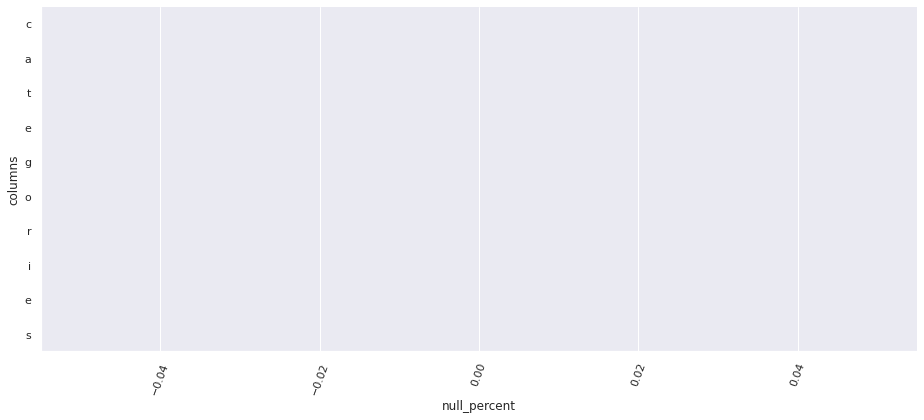

In [121]:
plot_df_xy(data_na_sort, 'null_percent', 'columns', 6)

In [98]:
nan_values = df.isnull().sum()
nan_percent = nan_values /df.shape[0]*100


code                                                     0.000000  
url                                                      0.000000  
creator                                                  0.000175  
created_t                                                0.000000  
created_datetime                                         0.000000  
last_modified_t                                          0.000000  
last_modified_datetime                                   0.000000  
product_name                                             3.768033  
abbreviated_product_name                                 99.655468 
generic_name                                             94.412440 
quantity                                                 74.444177 
packaging                                                85.265126 
packaging_tags                                           85.265564 
packaging_fr                                             85.265564 
packaging_text                                  

In [102]:
plot_df_xy(data=nan_values, nan_percent, nan_percent.index)

SyntaxError: positional argument follows keyword argument (3751189674.py, line 1)

In [ ]:
plt.figure(figsize=(30, 8))
sns.distplot(nan_values, kde=False, bins=np.int(df.shape[0]/10000))


In [130]:
# find columns with 100% missing values
top_df_high_miss = data_na.loc[data_na["null_percent"] >= 97].index

# drop columns with 100% missing values
top_df = df.drop(top_df_high_miss, axis = 1)
top_df.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity', 'packaging', 'packaging_tags',
       'packaging_fr', 'brands', 'brands_tags', 'categories',
       'categories_tags', 'categories_fr', 'origins', 'origins_tags',
       'origins_fr', 'manufacturing_places', 'manufacturing_places_tags',
       'labels', 'labels_tags', 'labels_fr', 'emb_codes', 'emb_codes_tags',
       'first_packaging_code_geo', 'cities_tags', 'purchase_places', 'stores',
       'countries', 'countries_tags', 'countries_fr', 'ingredients_text',
       'ingredients_tags', 'allergens', 'traces', 'traces_tags', 'traces_fr',
       'serving_size', 'serving_quantity', 'additives_n', 'additives_tags',
       'additives_fr', 'nutriscore_score', 'nutriscore_grade', 'nova_group',
       'pnns_groups_1', 'pnns_groups_2', 'food_groups', 'food_groups_tags',
       'food_groups_fr', 'states', 'states_tags', 'states_

In [ ]:
get_df_columns_na(top_df)

In [ ]:
top_nan_values = top_df.isnull().sum()
top_nan_percent = top_nan_values /top_df.shape[0]*100